In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import re


In [2]:
with sq.connect('olx_flat.db') as con:
    df_flats = pd.read_sql('SELECT * FROM flats',con)

In [3]:
df_flats.set_index('id',inplace = True)

In [4]:
pd.set_option('display.max_colwidth',1000 ) 

In [5]:
df_flats.describe()

,price
count,1299.000000
mean,37451.518861
std,40716.934691
min,1100.000000
25%,13000.000000
50%,25000.000000
75%,44519.000000
max,296794.000000


In [6]:
df_flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 1 to 1299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1299 non-null   object
 1   price     1299 non-null   int64 
 2   location  1299 non-null   object
 3   time      1299 non-null   object
 4   link      1299 non-null   object
dtypes: int64(1), object(4)
memory usage: 60.9+ KB


### Let's modify our data set: 

    


#### Firstly,  drop duplicates,because some applications can repeat

In [7]:
df_flats.drop_duplicates(subset = ['title'],keep = 'first',inplace = True)

In [8]:
df_flats

,title,price,location,time,link
id,,,,,
1,"Аоенда 2-х ком, ст.м.Харьковская, ул.Вишняковская 7",8990,"Київ, Дарницький",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/aoenda-2-h-kom-st-m-harkovskaya-ul-vishnyakovskaya-7-IDOIvuO.html
2,"Сдам уютную, 3 к квартиру, в отличном состоянии, возле набережной!",15000,"Київ, Оболонський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/sdam-uyutnuyu-3-k-kvartiru-v-otlichnom-sostoyanii-vozle-naberezhnoy-IDSKt72.html
3,Оренда супер стильної та дуже комфортної з власною терасою ЖК«Ліпінка»,25000,"Київ, Подільський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/orenda-super-stilno-ta-duzhe-komfortno-z-vlasnoyu-terasoyu-zhklpnka-IDSDfgm.html
4,Оренда 2 кімн. кв. бул. Перова 25/ квартира на Воскресенке,8000,"Київ, Дніпровський",Сьогодні о 09:49,https://www.olx.ua/d/uk/obyavlenie/orenda-2-kmn-kv-bul-perova-25-kvartira-na-voskresenke-IDSLhoy.html
5,Первая Сдача ! 2кк -65м2 на Лютеранской 6 -СВЕТ НЕ ВЫКЛЮЧАЮТ,44519,"Київ, Печерський",Сьогодні о 09:45,https://www.olx.ua/d/uk/obyavlenie/pervaya-sdacha-2kk-65m2-na-lyuteranskoy-6-svet-ne-vyklyuchayut-IDSLhba.html
...,...,...,...,...,...
1295,шикарная видовая 3-комнатная квартира в ЖК Obolon Residences,51939,"Київ, Оболонський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/shikarnaya-vidovaya-3-komnatnaya-kvartira-v-zhk-obolon-residences-IDSGIoL.html
1296,Аренда квартиры / Бульвар фонтанов / Печерск / 3-к / 122 м.кв,155817,"Київ, Печерський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/arenda-kvartiry-bulvar-fontanov-pechersk-3-k-122-m-kv-IDQu3s4.html
1297,"Дмитрівська,Лук*янівська,3-кім,Шевченківський,Центр,Золотоустівська",48229,"Київ, Печерський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/dmitrvska-lukyanvska-3-km-shevchenkvskiy-tsentr-zolotoustvska-IDSCW72.html


#### Secondly, we should get rid of 'Сьогодні' in time column and replace it with current data(in my case 17 серпня 2023 p.) 

In [9]:
df_flats.loc[df_flats['time'].str.contains('Сьогодні'),'time'] = '17 серпня 2023 p.'

In [10]:
df_flats

,title,price,location,time,link
id,,,,,
1,"Аоенда 2-х ком, ст.м.Харьковская, ул.Вишняковская 7",8990,"Київ, Дарницький",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/aoenda-2-h-kom-st-m-harkovskaya-ul-vishnyakovskaya-7-IDOIvuO.html
2,"Сдам уютную, 3 к квартиру, в отличном состоянии, возле набережной!",15000,"Київ, Оболонський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/sdam-uyutnuyu-3-k-kvartiru-v-otlichnom-sostoyanii-vozle-naberezhnoy-IDSKt72.html
3,Оренда супер стильної та дуже комфортної з власною терасою ЖК«Ліпінка»,25000,"Київ, Подільський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/orenda-super-stilno-ta-duzhe-komfortno-z-vlasnoyu-terasoyu-zhklpnka-IDSDfgm.html
4,Оренда 2 кімн. кв. бул. Перова 25/ квартира на Воскресенке,8000,"Київ, Дніпровський",17 серпня 2023 p.,https://www.olx.ua/d/uk/obyavlenie/orenda-2-kmn-kv-bul-perova-25-kvartira-na-voskresenke-IDSLhoy.html
5,Первая Сдача ! 2кк -65м2 на Лютеранской 6 -СВЕТ НЕ ВЫКЛЮЧАЮТ,44519,"Київ, Печерський",17 серпня 2023 p.,https://www.olx.ua/d/uk/obyavlenie/pervaya-sdacha-2kk-65m2-na-lyuteranskoy-6-svet-ne-vyklyuchayut-IDSLhba.html
...,...,...,...,...,...
1295,шикарная видовая 3-комнатная квартира в ЖК Obolon Residences,51939,"Київ, Оболонський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/shikarnaya-vidovaya-3-komnatnaya-kvartira-v-zhk-obolon-residences-IDSGIoL.html
1296,Аренда квартиры / Бульвар фонтанов / Печерск / 3-к / 122 м.кв,155817,"Київ, Печерський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/arenda-kvartiry-bulvar-fontanov-pechersk-3-k-122-m-kv-IDQu3s4.html
1297,"Дмитрівська,Лук*янівська,3-кім,Шевченківський,Центр,Золотоустівська",48229,"Київ, Печерський",16 серпня 2023 р.,https://www.olx.ua/d/uk/obyavlenie/dmitrvska-lukyanvska-3-km-shevchenkvskiy-tsentr-zolotoustvska-IDSCW72.html


#### Thirdly, let's check whether data contains missing values or not 

In [11]:
contains_special_values = df_flats.applymap(lambda x: 'NaN' in str(x)).any()
contains_special_values

title       False
price       False
location    False
time        False
link        False
dtype: bool

##### fortunately,data doesn't seem to have any missing values

#### Let's drop the link column so it has no sense for our survey 

In [12]:
df_flats.drop(columns = 'link',axis = 1,inplace = True)


In [13]:
df_flats

,title,price,location,time
id,,,,
1,"Аоенда 2-х ком, ст.м.Харьковская, ул.Вишняковская 7",8990,"Київ, Дарницький",16 серпня 2023 р.
2,"Сдам уютную, 3 к квартиру, в отличном состоянии, возле набережной!",15000,"Київ, Оболонський",16 серпня 2023 р.
3,Оренда супер стильної та дуже комфортної з власною терасою ЖК«Ліпінка»,25000,"Київ, Подільський",16 серпня 2023 р.
4,Оренда 2 кімн. кв. бул. Перова 25/ квартира на Воскресенке,8000,"Київ, Дніпровський",17 серпня 2023 p.
5,Первая Сдача ! 2кк -65м2 на Лютеранской 6 -СВЕТ НЕ ВЫКЛЮЧАЮТ,44519,"Київ, Печерський",17 серпня 2023 p.
...,...,...,...,...
1295,шикарная видовая 3-комнатная квартира в ЖК Obolon Residences,51939,"Київ, Оболонський",16 серпня 2023 р.
1296,Аренда квартиры / Бульвар фонтанов / Печерск / 3-к / 122 м.кв,155817,"Київ, Печерський",16 серпня 2023 р.
1297,"Дмитрівська,Лук*янівська,3-кім,Шевченківський,Центр,Золотоустівська",48229,"Київ, Печерський",16 серпня 2023 р.


#### Next, we are  going to create room columns in order to define the number of rooms.For this purposes we will write a regex and then we will modify the text manually in some cases,because the number of rooms can be written as a text


In [14]:
def extract_rooms(description):
    pattern = r"(\d+)\s*[ккк]?"  
    match = re.search(pattern, description)
    if match:
        return int(match.group(1))
    else:
        return None
df_flats['rooms'] = df_flats['title'].apply(extract_rooms)   


In [15]:
df_flats.loc[df_flats['title'].str.contains(r'(?:Двок|двок)', case=False),'rooms'] = 2
df_flats.loc[df_flats['title'].str.contains(r'(?:Трик|трик|3к|3 комн)', case=False),'rooms'] = 3

In [16]:
df_flats

,title,price,location,time,rooms
id,,,,,
1,"Аоенда 2-х ком, ст.м.Харьковская, ул.Вишняковская 7",8990,"Київ, Дарницький",16 серпня 2023 р.,2.0
2,"Сдам уютную, 3 к квартиру, в отличном состоянии, возле набережной!",15000,"Київ, Оболонський",16 серпня 2023 р.,3.0
3,Оренда супер стильної та дуже комфортної з власною терасою ЖК«Ліпінка»,25000,"Київ, Подільський",16 серпня 2023 р.,NaN
4,Оренда 2 кімн. кв. бул. Перова 25/ квартира на Воскресенке,8000,"Київ, Дніпровський",17 серпня 2023 p.,2.0
5,Первая Сдача ! 2кк -65м2 на Лютеранской 6 -СВЕТ НЕ ВЫКЛЮЧАЮТ,44519,"Київ, Печерський",17 серпня 2023 p.,2.0
...,...,...,...,...,...
1295,шикарная видовая 3-комнатная квартира в ЖК Obolon Residences,51939,"Київ, Оболонський",16 серпня 2023 р.,3.0
1296,Аренда квартиры / Бульвар фонтанов / Печерск / 3-к / 122 м.кв,155817,"Київ, Печерський",16 серпня 2023 р.,3.0
1297,"Дмитрівська,Лук*янівська,3-кім,Шевченківський,Центр,Золотоустівська",48229,"Київ, Печерський",16 серпня 2023 р.,3.0


#### Next let's get rid of flats,which have NaN rooms or their number is > 5( our regex is not very accurate,so we forced to do it)

In [17]:
df_flats = df_flats[(df_flats['rooms'] > 0) & (df_flats['rooms'] <= 5) & (df_flats['rooms'] != 'NaN')]

In [29]:
df_flats['rooms'] = df_flats['rooms'].apply(int)

#### Now let's visualize our data in defferent ways 

##### Pie chat,which shows correlation between posts about rent and number of rooms 

<AxesSubplot: title={'center': 'Correlation between rent posts and rooms'}>

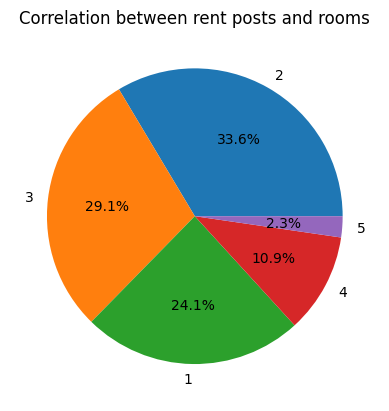

In [19]:
df_flats['rooms'].value_counts(normalize = True).plot(kind = 'pie',
                                                      autopct = '%.1f%%',
                                                      title = 'Correlation between rent posts and rooms',
                                                      ylabel = '')

##### basically this plot  shows the the most popular options are rent of two-,three-,one-room apartments

### Let's define whether our data contain outliers  or not

<AxesSubplot: >

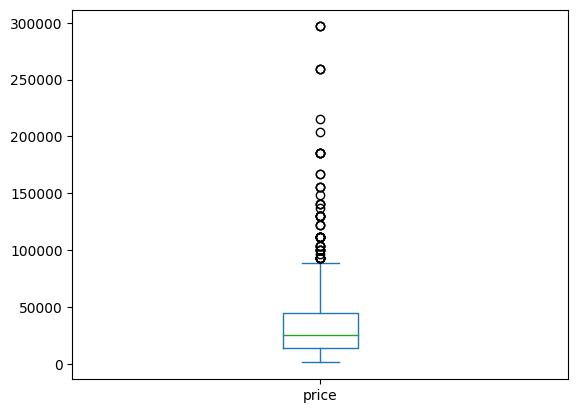

In [20]:
df_flats['price'].plot(kind = 'box')

#### Is seems like there are a bunch of outliers we need to get rid of to see an objective information 

In [21]:
Q1 = df_flats['price'].quantile(0.25)
Q3 = df_flats['price'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
df_flats = df_flats[(df_flats['price'] >= (Q1 - 1.5 * IQR)) & (df_flats['price'] <= (Q3 + 1.5 * IQR))]
df_flats

,title,price,location,time,rooms
id,,,,,
1,"Аоенда 2-х ком, ст.м.Харьковская, ул.Вишняковская 7",8990,"Київ, Дарницький",16 серпня 2023 р.,2
2,"Сдам уютную, 3 к квартиру, в отличном состоянии, возле набережной!",15000,"Київ, Оболонський",16 серпня 2023 р.,3
4,Оренда 2 кімн. кв. бул. Перова 25/ квартира на Воскресенке,8000,"Київ, Дніпровський",17 серпня 2023 p.,2
5,Первая Сдача ! 2кк -65м2 на Лютеранской 6 -СВЕТ НЕ ВЫКЛЮЧАЮТ,44519,"Київ, Печерський",17 серпня 2023 p.,2
7,"Аренда 3-ком (110м) Капитолий, Крещатик, Печерск, Липки, Центр",74198,"Київ, Печерський",17 серпня 2023 p.,3
...,...,...,...,...,...
1291,Лесі Українки 7б Оренда 3к Квартири Печерськ Центр,40990,"Київ, Печерський",16 серпня 2023 р.,3
1293,"Сдам 3-х комнатную квартиру рядом с метро ""Академгородок""",19500,"Київ, Святошинський",16 серпня 2023 р.,3
1295,шикарная видовая 3-комнатная квартира в ЖК Obolon Residences,51939,"Київ, Оболонський",16 серпня 2023 р.,3


#### Let's create pivot_table with avarage price for flats in different districts of Kyiv 

In [23]:
data_pivot = pd.pivot_table(
df_flats,
index = 'rooms',
columns = 'location',    
values = 'price',
aggfunc = 'mean',
fill_value = 0    
)


In [24]:
sorted_columns = data_pivot.mean().sort_values(ascending=False).index
sorted_data_pivot = data_pivot[sorted_columns]
sorted_data_pivot

location,"Київ, Печерський","Київ, Шевченківський","Київ, Голосіївський","Київ, Подільський","Київ, Солом'янський","Київ, Дніпровський","Київ, Дарницький","Київ, Оболонський","Київ, Святошинський","Київ, Деснянський"
rooms,,,,,,,,,,
1,32369.600000,18699.800000,16238.080000,12827.636364,11598.333333,10585.571429,13944.904762,17376.666667,11291.562500,7133.2
2,39493.284211,28014.735294,25537.533333,17768.357143,17793.437500,13903.291667,15618.575758,17776.550000,12475.250000,9600.0
3,48496.728261,36182.562500,30041.000000,29324.111111,31572.500000,27013.700000,25048.315789,32891.312500,16083.166667,12187.5
4,58377.454545,52228.846154,44519.000000,47341.000000,37037.250000,44519.000000,18000.000000,14550.000000,26000.000000,18000.0
5,39905.200000,33389.250000,24500.000000,18000.000000,0.000000,0.000000,15000.000000,0.000000,0.000000,0.0


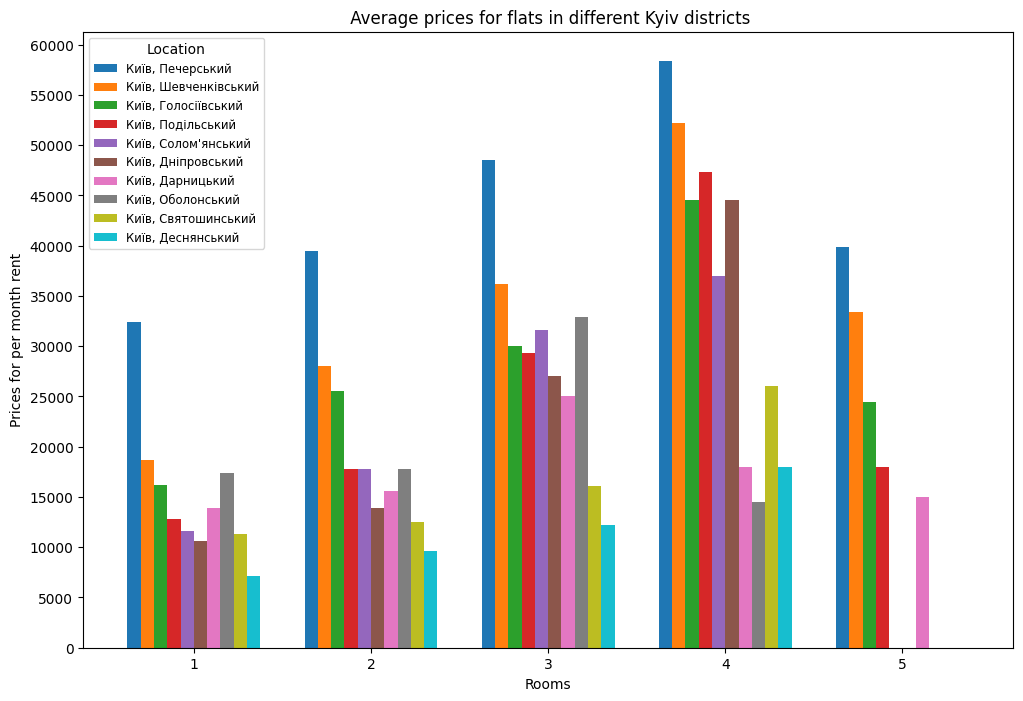

In [28]:
sorted_data_pivot.plot(kind = 'bar',
               figsize = (12,8),
               title =' Average prices for flats in different Kyiv districts',
               xlabel = 'Rooms',
               ylabel = 'Prices for per month rent',
               width = 0.75)
plt.legend(title='Location',
           fontsize = 'small')
plt.xticks(rotation=360)
plt.yticks(range(0,65000,5000))
plt.show()